# Analyse de Grille Hamiltonienne et Recherche de Chemin Quantique

## Aperçu
Ce notebook démontre l'analyse d'un réseau de grille Hamiltonienne avec des propriétés mécaniques quantiques. Il inclut :
- Initialisation du réseau avec des points d'entrée et de sortie configurables
- Propagation d'état quantique et calculs de fonction d'onde
- Analyse de résistance effective
- Identification du chemin le plus court en utilisant la pondération quantique
- Visualisation des distributions d'états quantiques à travers le réseau

## Composants Clés
- **HamiltonianGrid** : Une structure de graphe personnalisée qui implémente la mécanique quantique sur un réseau
- **Visualisation de Réseau** : Représentations interactives et statiques du réseau
- **Analyse Quantique** : Calcul des fonctions d'onde, résistances effectives et poids quantiques

In [4]:
# Importation des Bibliothèques Requises
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from utils import HamiltonianGrid

from pyvis.network import Network
from networkx.readwrite import json_graph
import json

# Ces importations fournissent :
# - numpy : calculs numériques et tableaux
# - networkx : structure de graphe et algorithmes
# - matplotlib : visualisations statiques
# - HamiltonianGrid : implémentation personnalisée de réseau quantique
# - pyvis : visualisations de réseau interactives

## Étape 1 : Initialisation de la Grille de Réseau Hamiltonienne

Créez un réseau quantique avec des dimensions spécifiées, un point d'entrée et un point de sortie. Le réseau sera peuplé de poids quantiques.

**Paramètres:**
- `N` : Taille de la grille (N × N nœuds)
- `q_N` : Nombre de niveaux quantiques
- `(ix, iy)` : Position du point d'entrée
- `(ex, ey)` : Position du point de sortie
- `iw, ew` : États de poids initiaux

In [20]:
# Configuration des paramètres du réseau
N = 10  # Taille de la grille
ix = N//2  # Position x d'entrée
iy = N//2  # Position y d'entrée
iw = 1    # Poids d'entrée

ex = N//2+1  # Position x de sortie
ey = N//2    # Position y de sortie
ew = -1       # Poids de sortie

q_N = 100  # Nombre de niveaux quantiques

# Initialiser la grille hamiltonienne et créer le réseau
G = HamiltonianGrid(N, q_N, ix, iy, iw, ex, ey, ew)
G.create_network(N)

# Optionnel : Commenté pour supprimer des éléments spécifiques
# for i in range(4,10):
#     G.remove_element("L", i, 2, "h")

## Étape 2 : Propagation de l'État Quantique Initial

Itérez à travers les états quantiques et appliquez la fonction d'onde initiale. Affichage du réseau avec les poids quantiques.

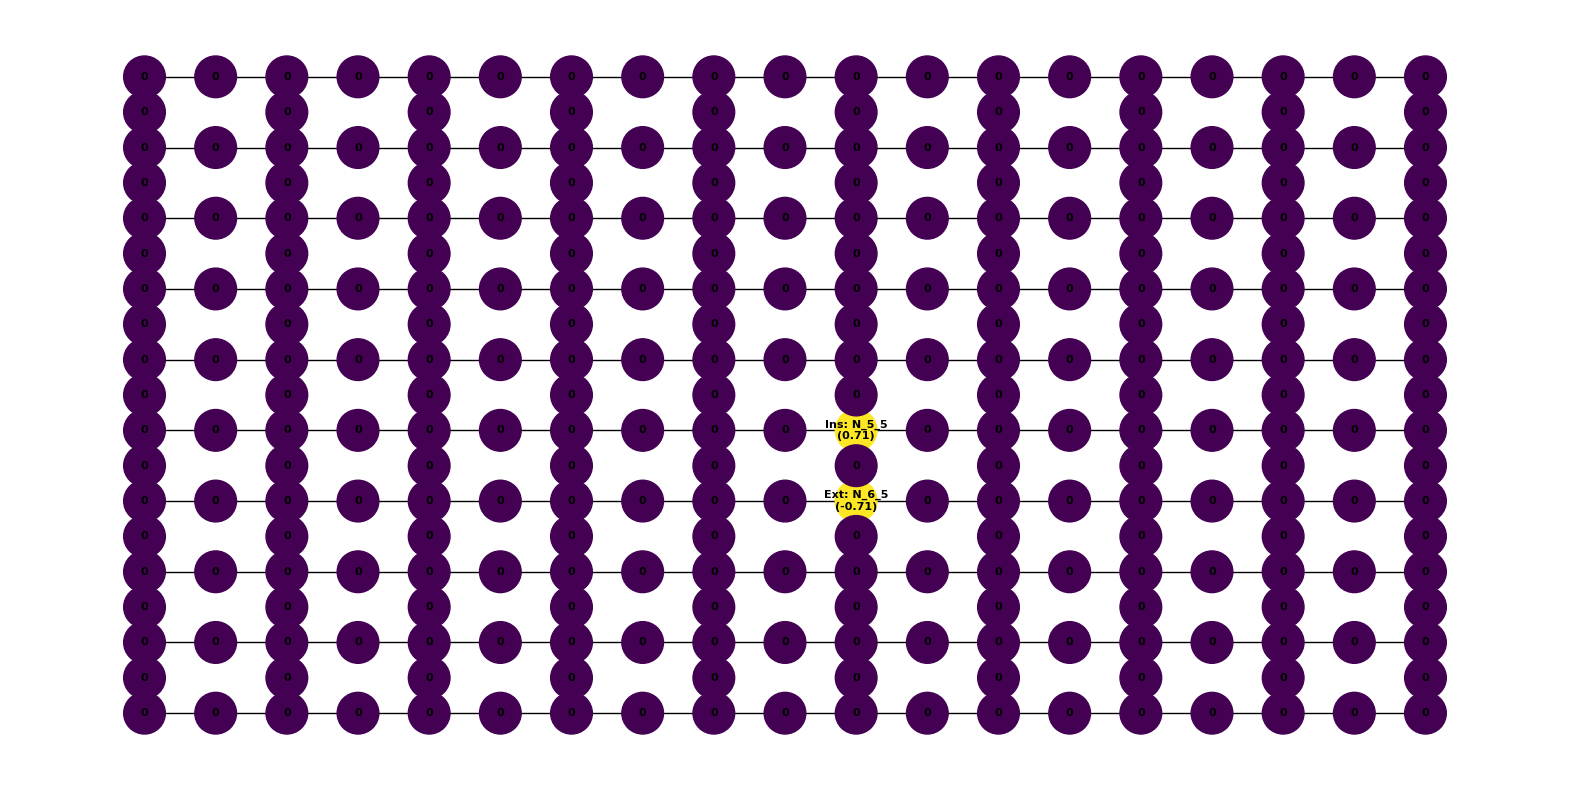

In [21]:
# Itérer à travers tous les états quantiques du système
G.iterate_qs()

# Appliquer la première fonction d'onde au graphe
G.apply_q_i(1)

# Visualiser le réseau avec les poids quantiques
G.draw_network(figsize=(20,10), with_labels=True, node_size=900)

## Étape 3 : Calcul de la Fonction d'Onde Approximative

Calculer l'approximation de la fonction d'onde (psi) et l'appliquer à la structure du graphe.

In [ ]:
# Calculer l'approximation de la fonction d'onde
psi_approx = G.calculate_psi_approx()

# Appliquer l'approximation psi au réseau (PSI final)
G.apply_psi_to_graph(0)

## Étape 4 : Visualisation Détaillée du Réseau avec Fonction d'Onde

Affichage à haute résolution du réseau avec les poids de fonction d'onde appliqués.

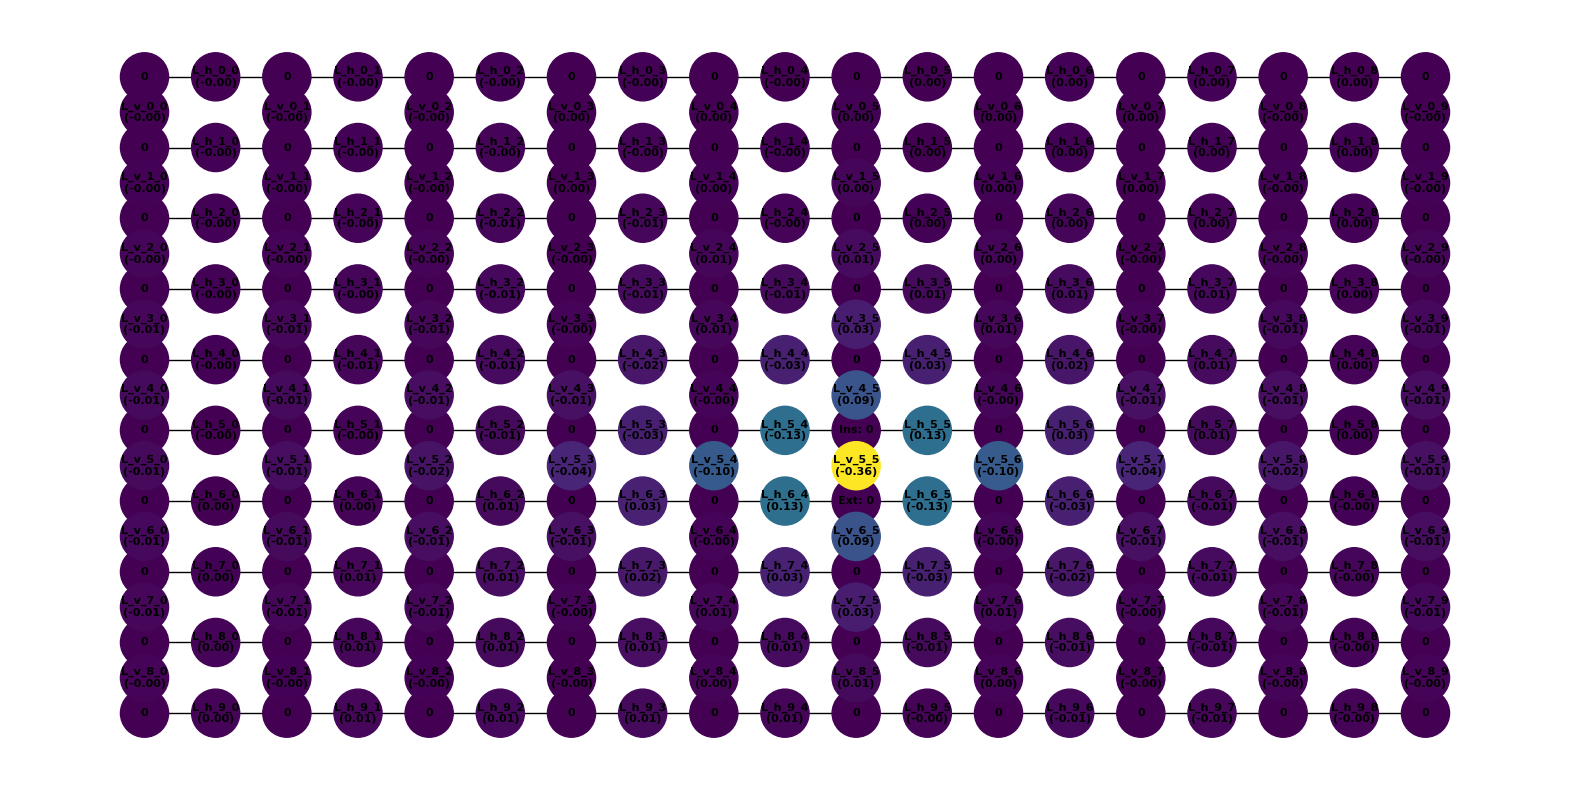

In [27]:
# Afficher le réseau avec haute résolution et étiquettes de nœuds
G.draw_network(figsize=(20,10), node_size=1200, with_labels=True)

## Étape 5 : Analyse des Coefficients Quantiques

Visualisation des coefficients kappa (courbure) et bêta (amortissement) du système quantique.

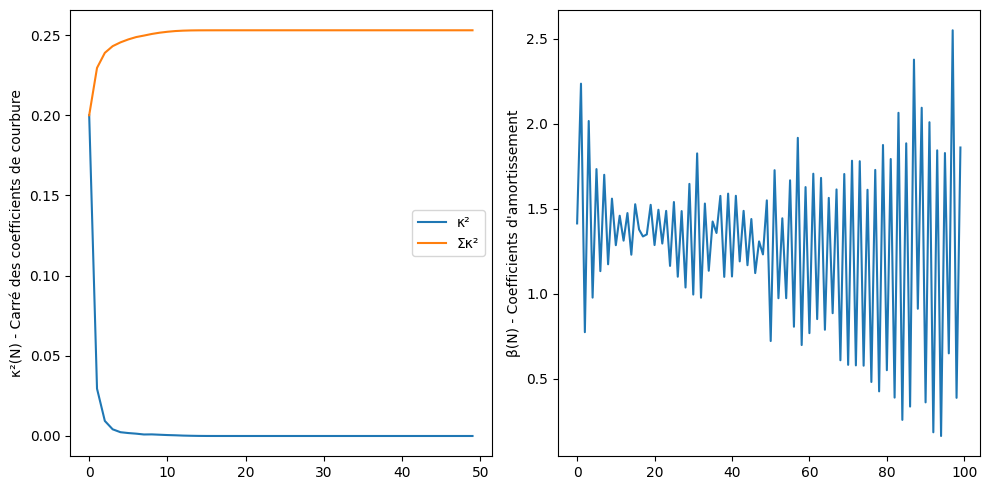

In [28]:
import matplotlib.pyplot as plt

# Préparer les données pour l'analyse
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

kappa_sq = G.kappas**2  # Carré des coefficients kappa
kappas_sum = np.cumsum(kappa_sq)  # Somme cumulative

# Tracer les coefficients kappa et leur somme cumulative
axs[0].plot(G.kappas**2, label='κ²')
axs[0].set_ylabel('κ²(N) - Carré des coefficients de courbure')
axs[0].plot(kappas_sum, label='Σκ²')
axs[0].legend()

# Tracer les coefficients bêta
axs[1].plot(G.betas)
axs[1].set_ylabel('β(N) - Coefficients d\'amortissement')

plt.tight_layout()
plt.show()

## Étape 6 : Analyse des Résistances Effectives et Densités de Probabilité

Calculer les résistances effectives du système et comparer avec les carrés de la fonction d'onde.

Résistance effective : 3.9532


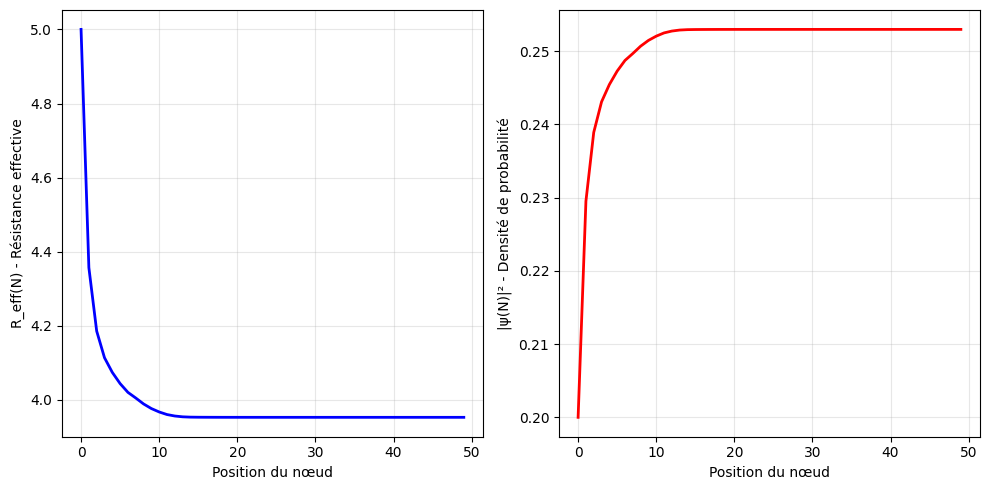

In [34]:
import matplotlib.pyplot as plt

# Calculer les résistances effectives et carrés de la fonction d'onde
psi_squareds = G.psi_approx_squared()
resistances_eff = G.calculate_effective_resistances()

# Afficher la résistance effective moyenne
print(f"Résistance effective : {np.mean(resistances_eff[-1]):.4f}")

# Créer deux graphiques comparatifs
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Graphique 1 : Résistances effectives
axs[0].plot(resistances_eff, 'b-', linewidth=2)
axs[0].set_ylabel('R_eff(N) - Résistance effective')
axs[0].set_xlabel('Position du nœud')
axs[0].grid(True, alpha=0.3)

# Graphique 2 : Densité de probabilité (ψ²)
axs[1].plot(psi_squareds, 'r-', linewidth=2)
axs[1].set_ylabel('|ψ(N)|² - Densité de probabilité')
axs[1].set_xlabel('Position du nœud')
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Étape 7 : Recherche du Chemin le Plus Court via Pondération Quantique

Utiliser les poids quantiques pour identifier le chemin optimal du point d'entrée au point de sortie. Le chemin suit les arêtes avec les poids quantiques les plus élevés.

Chemin quantique optimal :
['N_5_5', 'L_v_5_5', 'N_6_5']


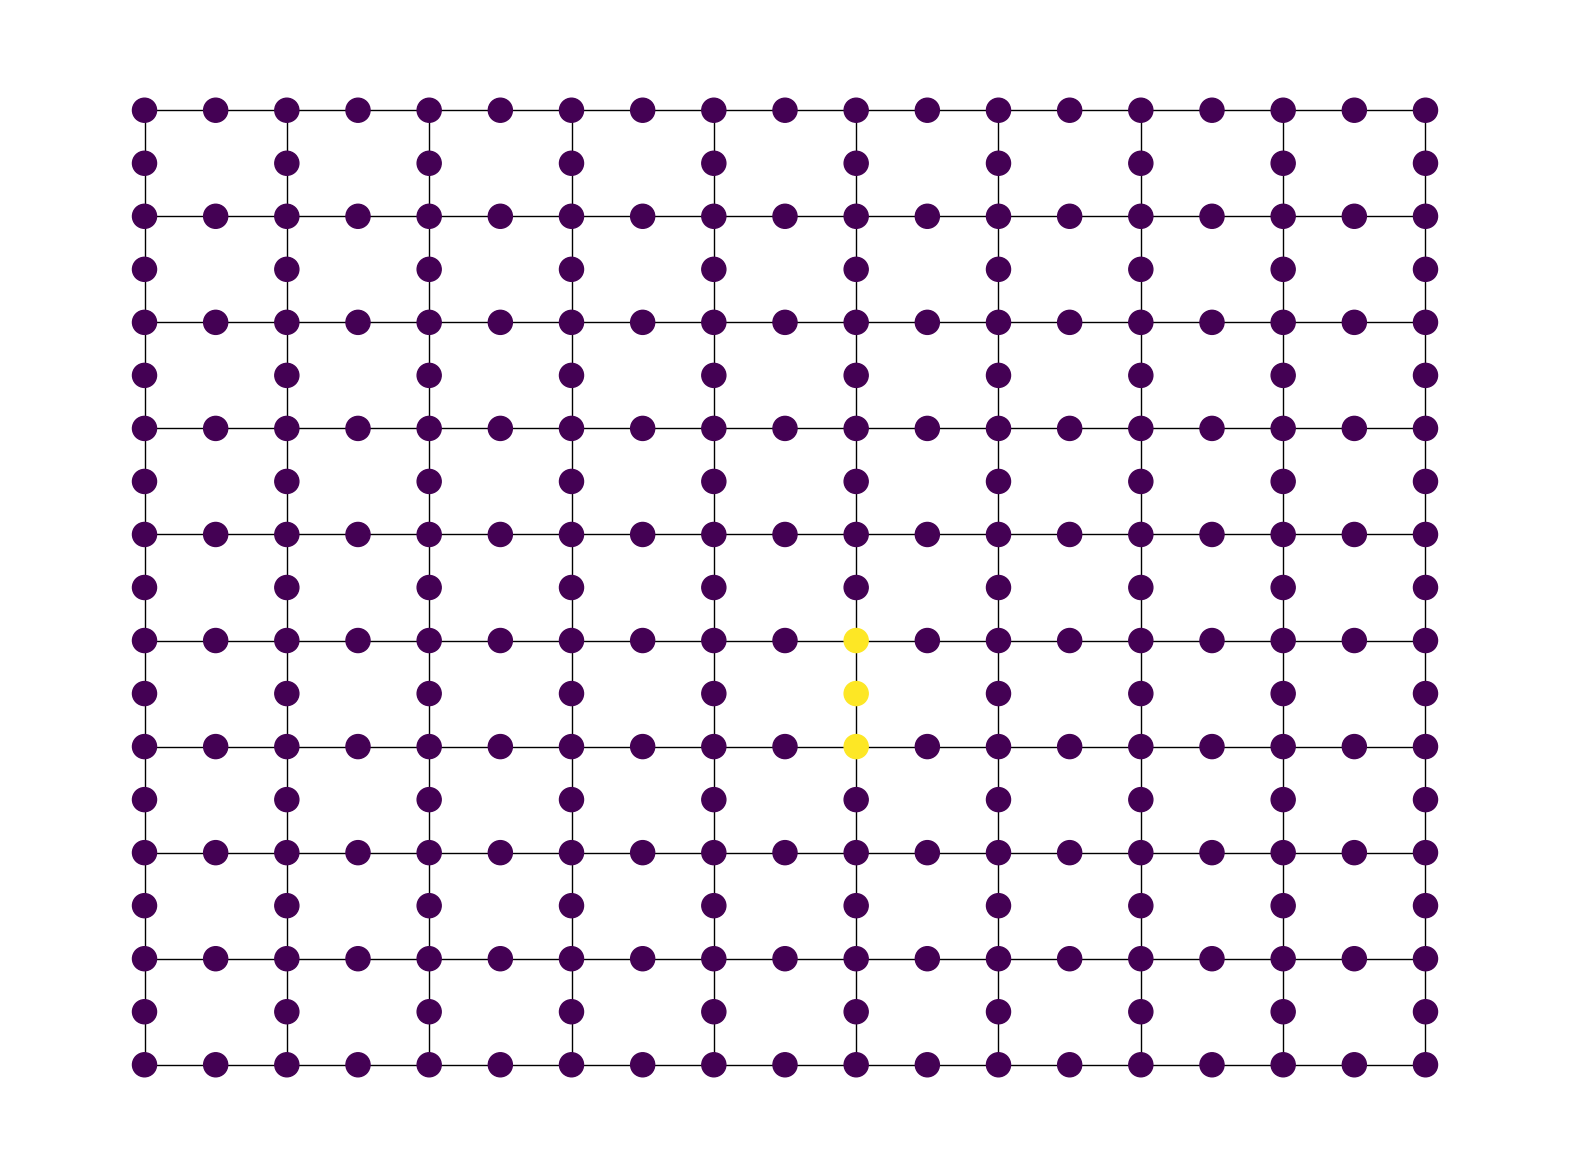

In [31]:
import math
import copy

# Copie profonde du graphe pour l'analyse du chemin
shortest_path_graph = copy.deepcopy(G)

def find_the_shortest_path(G, ix, iy):
    """
    Trouve le chemin le plus court du point d'entrée au point de sortie en utilisant les poids quantiques.
    
    Paramètres :
    -----------
    G : HamiltonianGrid
        Le graphe avec les poids quantiques
    ix, iy : int
        Coordonnées du point d'entrée
        
    Retour :
    --------
    shortest_path : list
        Liste des nœuds du chemin optimal
    """
    next_node = f"N_{ix}_{iy}"
    exit_node = f"N_{ex}_{ey}"
    shortest_path = [next_node]
    max_adj_node = 0
    
    # Itérer jusqu'au point de sortie
    while next_node != exit_node:
        for adj in G.adj[next_node]:
            # Sauter les nœuds déjà visités
            if adj in shortest_path:
                continue
            
            w = G.nodes[adj]["weight"]
            
            # Préférer les nœuds quantiques (nodes), sinon suivre le poids le plus élevé
            if G.nodes[adj]["type"] == "node":
                next_node = adj
            elif abs(w) > max_adj_node:
                next_node = adj
                max_adj_node = abs(w)
        
        max_adj_node = 0
        shortest_path.append(next_node)
    
    # Marquer les nœuds du chemin (poids = 1) et les autres (poids = 0)
    for node in G.nodes():
        if node in shortest_path:
            G.nodes[node]['weight'] = 1
        else:
            G.nodes[node]['weight'] = 0
    
    return shortest_path

# Afficher le chemin trouvé
print("Chemin quantique optimal :")
print(find_the_shortest_path(G, ix, iy))

# Visualiser le réseau avec le chemin mis en évidence
shortest_path_graph.draw_network(figsize=(20,15), node_size=300, with_labels=False)

## Étape 8 : Visualisation Radar de la Fonction d'Onde

Créer un diagramme radar pour visualiser l'évolution de la fonction d'onde ψ à travers toutes les étapes de propagation pour un nœud ou une arête spécifique.

In [33]:
import plotly.graph_objects as go

def plot_node_radar(G):
    """
    Crée un diagramme radar des composantes ψ pour un nœud ou une arête spécifique.
    
    Paramètres :
    -----------
    G : HamiltonianGrid
        L'objet grille quantique
    target_node : str
        L'identifiant du nœud ou de l'arête à inspecter
        
    Retour :
    --------
    Affiche une figure Plotly interactive
    """
    # Créer les catégories pour chaque étape
    categories = [f"Ligne {i+1}" for i in range(len(G._lines))]
    
    # Récupérer les valeurs ψ pour chaque étape
    values = [G.psis[-1].get(G._lines[i], 0) for i in range(len(G._lines))]
    
    # Fermer la boucle pour le diagramme radar
    categories_closed = categories + [categories[0]]
    values_closed = values + [values[0]]

    fig = go.Figure()

    # Ajouter la trace ψ
    fig.add_trace(go.Scatterpolar(
        r=values_closed,
        theta=categories_closed,
        fill='toself',
        name=f'Nœud de ligne',
        line_color='cyan'
    ))

    # Configurer la mise en page
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True, 
                range=[min(values)-0.1, max(values)+0.1]
            )
        ),
        showlegend=True,
        title=f"Profil Quantique ψ: Nœud de ligne",
        template="plotly_dark"
    )

    fig.show()

# Afficher le profil quantique pour l'arête d'entrée
plot_node_radar(G)